# Linear Regression

Stanford CS229 - Machine Learning by Andrew Ng. Programming exercise 1.

Please check out [the repository on GitHub](https://github.com/rickwierenga/CS229-Python/). If you spot any mistakes or inconcistencies, please create an issue. For questions you can find me on Twitter: [@rickwierenga](https://twitter.com/rickwierenga). Starring the project on GitHub means a ton to me!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

## Linear Regression with a single variable
---
In this part of this exercise, you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next.

In [2]:
# start by loading the data
!wget https://raw.githubusercontent.com/annigue/CS229-Python/master/ex1/ex1data1.txt
data = pd.read_csv('ex1data1.txt', header=None, names=['Population', 'Profit'])

# initialize some useful variables
m = len(data) # the number of training examples
X = np.append(np.ones((m, 1)), np.array(data["Population"]).reshape((m,1)), axis=1) # Add x0, a vector of 1's, to X.
y = np.array(data["Profit"]).reshape(m, 1)

data.head()

--2025-04-09 12:39:09--  https://raw.githubusercontent.com/annigue/CS229-Python/master/ex1/ex1data1.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1359 (1.3K) [text/plain]
Saving to: ‘ex1data1.txt’

ex1data1.txt        100%[===================>]   1.33K  --.-KB/s    in 0s      

2025-04-09 12:39:09 (63.0 MB/s) - ‘ex1data1.txt’ saved [1359/1359]



,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

### Visualising the data
Plotting helps us get insight in the data we are working with. Using the `'bx'` option, we get blue crosses. You can read more about markers [here](https://matplotlib.org/api/markers_api.html).

Text(0.5, 1.0, 'Relation between profit and population')

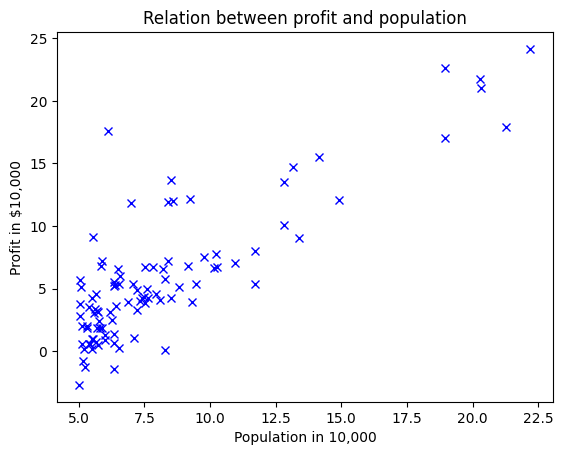

In [3]:
plt.plot(data['Population'], data['Profit'], 'bx')
plt.xlabel('Population in 10,000')
plt.ylabel('Profit in $10,000')
plt.title('Relation between profit and population')

### The hypotheses function
Our hypothesis function has the general form:
$y= h_\theta(x)= \theta_0 + \theta_1x$
Note that this is like the equation of a straight line. We give to $h_\theta(x)$ values for $\theta_0$ and $\theta_1$ to get our estimated output y. In other words, we are trying to create a function called $h_\theta$ that is trying to map our input data (the x's) to our output data (the y's).

### Cost function

The cost functions yields "how far off" our hypotheses $h_\theta$ is. It takes the avarage of the distance between our hypothesis and the actual point and squares it. Formally, the cost function has the following definition:

$J(\theta) = \frac{1}{2m} \displaystyle\sum_{i = 0}^{m}(h_θ(x^{(i)}) - y^{(i)})^2$

#### Vectorization
Vectorizations is the act of replacing the loops in a computer program with matrix operations. If you have a good linear algebra library (like numpy), the library will optimize the code automatically for the computer the code runs on. Mathematically, the 'regular' function should mean the same as the vectorized function.

Gradient descent vectorized:
$\theta = \frac{1}{2m}(X\theta - \vec{y})^T(X\theta-\vec{y})$

**Exercise**: Implement a vectorized implementation of the cost function.

In [9]:
# Die Kostenfunktion (cost_function) gibt einen einzelnen Wert zurück – eine Zahl, die angibt, wie gut oder schlecht dein aktueller theta-Vektor ist.
# Es handelt sich um die mittlere quadratische Abweichung zwischen den Vorhersagen deines Modells und den tatsächlichen Zielwerten. --> je kleiner desto besser
def cost_function(X, y, theta):
    """ Computes the cost of using theta as the parameter for linear gression to fit the data in X and y. """
    #m = len(y)
    predictions = X @ theta           # oder np.dot(X, theta)
    errors = predictions - y
    cost = (1 / (2 * m)) * (errors.T @ errors)  # oder np.dot(errors.T, errors)
    return cost


In [12]:
theta = np.array([0,0]) #angegebener Wert für theta
print(cost_function(X,y,theta))

[[32.07273388 32.07273388 32.07273388 ... 32.07273388 32.07273388
  32.07273388]
 [32.07273388 32.07273388 32.07273388 ... 32.07273388 32.07273388
  32.07273388]
 [32.07273388 32.07273388 32.07273388 ... 32.07273388 32.07273388
  32.07273388]
 ...
 [32.07273388 32.07273388 32.07273388 ... 32.07273388 32.07273388
  32.07273388]
 [32.07273388 32.07273388 32.07273388 ... 32.07273388 32.07273388
  32.07273388]
 [32.07273388 32.07273388 32.07273388 ... 32.07273388 32.07273388
  32.07273388]]


With $\theta = \begin{bmatrix}0 & 0\end{bmatrix}$, $J(\theta)$ should return 32.07.

In [13]:
initial_theta = np.zeros((2,1)) #erzeugt Nullvektor als Startpunkt für den Algorithmus
print(cost_function(X, y, initial_theta))

[[32.07273388]]


### Gradient descent
We want are hypothesis $h_\theta(x)$ to function as good as possibly. Therefore, we want to minimalize the cost function $J(\theta)$. Gradient descent is an algorithm used to do that.

The formal definition of gradient descent:

$repeat \ \{ \\ \enspace \theta_j := \theta_j - \alpha \frac{1}{m}\displaystyle\sum_{i = 1}^{m}(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}\\\}$

An illustration of gradient descent on a single variable:
<div>
    <img style='max-width:50%;' src='https://github.com/annigue/CS229-Python/blob/master/ex1/notes/gradientdescent.png?raw=1'>
</div>

**Exercise**: Implement the gradient descent algorithm in Python.

In [16]:
# Funktion gradient descent für lineare regression mit mehreren feature
# X	Design-Matrix mit Features (inkl. 1. Spalte für Bias)
# y	Zielwerte (tatsächliche y-Werte)
# theta	Startwerte für die Parameter, die du optimieren willst
# alpha	Lernrate: wie groß jeder Schritt ist
# iterations	Wie oft soll aktualisiert werden

def gradient_descent(X, y, theta, alpha, iterations):
    """ Performs gradient descent to learn theta.
    Returns the found value for theta and the history of the cost function.
    """
    J_history = [] #→ Liste zum Speichern der Kostenfunktion
    for i in range(iterations): #→ Wiederhole so ift wie iterations nach jeder Iteration (zum Plotten oder Debugging)
      predictions = X @ theta #→ Berechne Vorhersagen für alle Beispiele mit dem aktuellen theta: y_hat = X*theta
      errors = predictions -y #→ Differenz zwischen Vorhersage und tatsächlichem Wert (also der "Fehler")
      theta = theta - (alpha / m) * (X.T @ errors)  #→ Der Gradienten-Descent-Schritt!: Aktualisiere theta durch:
      # X.T @ errors: der Gradient (Richtung, in der der Fehler am stärksten zunimmt)
      # alpha / m: Skalierung – Lernrate geteilt durch Anzahl der Beispiele
      # theta - ...: du gehst einen kleinen Schritt gegen den Gradienten
      J_history.append(cost_function(X,y,theta)[0,0]) # → Speichere den aktuellen Wert der Kostenfunktion in der Liste J_history
       # (Warum [0,0]? → Weil cost_function(...) einen 2D-Array mit einer Zahl zurückgibt)
    return theta, J_history # theta: die gelernten optimalen Parameter, J_history: Verlauf der Kostenfunktion über die Iterationen (kann man z. B. plotten)

Gradient descent should have found approximately the following: $\theta = \begin{bmatrix}-3.6303\\1.1664\end{bmatrix}$

In [26]:
# You can change different values for these variables
alpha = 0.01
iterations = 1500

theta, J_history = gradient_descent(X, y, initial_theta, alpha, iterations)
theta

array([[-3.63029144],
       [ 1.16636235]])

### Using the results
#### Plotting the regularization line

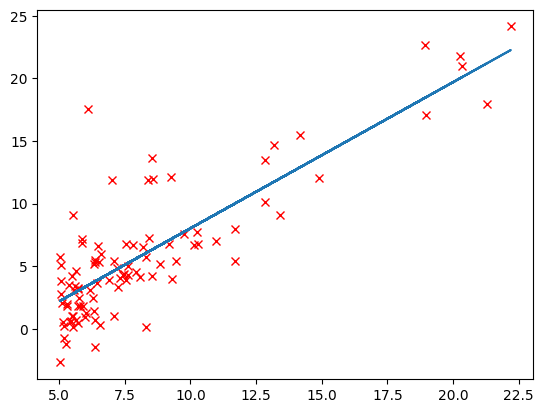

In [27]:
plt.plot(X[:,1], y, 'rx', label='Training data')
plt.plot(X[:,1], X.dot(theta), label='Linear regression')

#### Plotting the cost history
A plot of how $J(\theta)$ decreases over time. This is are model learning.

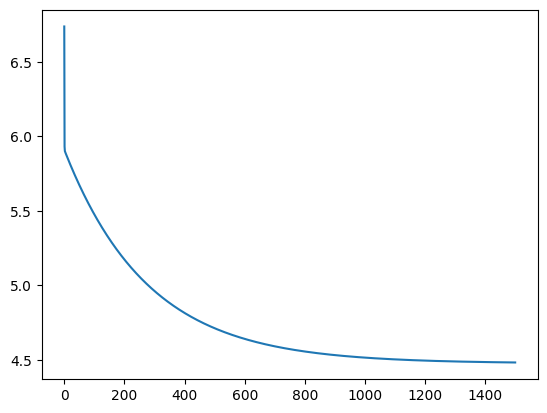

In [28]:
plt.plot(J_history)

#### Making a prediction using the model
The model can be used by calculating the dot product of the input and $\theta$.

In [29]:
prediction = np.array([1, 3.5]).dot(theta) * 10000 # don't forget to multiply the prediction by 10000
'In a city with a population of 35000, we predict a profit of $%.2f' % prediction

<ipython-input-29-a4e48c6d5631>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  'In a city with a population of 35000, we predict a profit of $%.2f' % prediction


'In a city with a population of 35000, we predict a profit of $4519.77'


## Multivariate Linear Regression

---
In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.

In [31]:
# load data
!wget https://raw.githubusercontent.com/annigue/CS229-Python/master/ex1/ex1data2.txt
data = pd.read_csv("ex1data2.txt", header = None, names=["Size", "Bedrooms","Price"])
m = len(data)

# es gibt jetzt mehrere Variablen, die in X enthalten sind

# Initialize X, y and theta
x0 = np.ones(m)
size = np.array((data["Size"]))
bedrooms = np.array((data["Bedrooms"]))
X = np.array([x0, size, bedrooms]).T #X ist eine Feature-Matrix mit m Zeilen (Beispielen) und n+1 Spalten (Features + Bias-Term).
y = np.array(data["Price"]).reshape(len(data.index), 1)
theta_init = np.zeros((3,1)) # → Ein Parameter (Gewicht) pro Feature plus eins für den Bias:

data.head()

--2025-04-09 13:07:00--  https://raw.githubusercontent.com/annigue/CS229-Python/master/ex1/ex1data2.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 657 [text/plain]
Saving to: ‘ex1data2.txt.1’

ex1data2.txt.1      100%[===================>]     657  --.-KB/s    in 0s      

2025-04-09 13:07:00 (31.9 MB/s) - ‘ex1data2.txt.1’ saved [657/657]



,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


### Feature Normalization
When features differ by order of magnitude, first performing feature scaling can make gradient descent converge much more quickly. Formally:

$x := \frac{x - \mu}{\sigma}$

Where $\mu$ is the average and $\sigma$ the standard deviation.

**Important**: It is crucial to store $\mu$ and $\sigma$ if you want to make predictions using the model later.

**Exercise**: Perform feature normalization on the following dataset.

In [32]:
#Die Werte von Size (z. B. 2104) sind viel größer als die von Bedrooms (z. B. 3).
# Das führt dazu, dass Gradient Descent sehr langsam oder nicht stabil konvergiert.
# Eine Normalisierung kann hier helfen

# perform normalization
def normalize(X):
    """ Normalizes the features in X

    returns a normalized version of X where
    the mean value of each feature is 0 and the standard deviation
    is 1. This is often a good preprocessing step to do when
    working with learning algorithms.
    """
    #→ Für jede Spalte (Feature) berechnest du den Mittelwert mu und die Standardabweichung sigma.
    mu = np.mean(X, axis=0)  # Mittelwert
    sigma = np.std(X, axis=0)  # Standardabweichung

    # Setze sigma auf 1, falls es 0 ist (um division by zero zu verhindern)
    sigma[sigma == 0] = 1

    X = (X - mu) / (sigma + 1e-10) #Jedes Feature wird zentriert (minus Mittelwert) und dann skaliert (geteilt durch σ).
    # Das + 1e-10 ist ein numerischer Schutz, damit du nie durch 0 teilst – clever!


    return X, mu, sigma

X[:, 1:], mu, sigma = normalize(X[:, 1:]) # Feature Matrix wird mit der normalisierten Version ersetzt
# Aber die Bias SPalte bleibt bei 1, sonst wäre sie nutzlos
X[0:5]

array([[ 1.        ,  0.13141542, -0.22609337],
       [ 1.        , -0.5096407 , -0.22609337],
       [ 1.        ,  0.5079087 , -0.22609337],
       [ 1.        , -0.74367706, -1.5543919 ],
       [ 1.        ,  1.27107075,  1.10220517]])

## Gradient Descent

Remember the algorithm for gradient descent:

$repeat \ \{ \\ \enspace \theta_j := \theta_j - \alpha \frac{1}{m}\displaystyle\sum_{i = 1}^{m}(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}\\\}$

The vectorization for multivariate gradient descent:

$\theta := \theta - \frac{\alpha}{m}X^T(X\theta - \vec{y})$

**Exercise**: Implement gradient descent for multiple features. Make sure your solution is vectorized and supports any number of features.

In [35]:
def gradient_descent_multi(X, y, theta, alpha, iterations):
    m = len(y)
    J_history = []

    for i in range(iterations):
        predictions = X @ theta #Vorhersage
        errors = predictions - y #Fehler
        theta = theta - (alpha / m) * (X.T @ errors) #Gradientenabstieg

        # Sicherstellen, dass die Kostenfunktion keine NaNs zurückgibt
        cost = cost_function(X, y, theta)
        #→ Prüfen, ob die Kostenfunktion NaN zurückgibt (z. B. wegen zu großer Lernrate)
        if np.isnan(cost).any():
            print("NaN detected in cost function at iteration", i)
            break

        J_history.append(cost[0, 0])

    return theta, J_history

# Lernrate verringern und testen
alpha = 0.01
iterations = 1500
initial_theta = np.zeros((3,1))
#→ Du brauchst ein Gewicht pro Feature, plus eins für den Bias-Term.
#(Früher bei univariat hattest du nur 2 Werte: Bias + 1 Feature)
theta, J_history = gradient_descent_multi(X, y, initial_theta, alpha, iterations)
theta


array([[340412.56301439],
       [109370.05670462],
       [ -6500.61509587]])

As before we see how the cost decreases over time.

Interpretation der theta-Werte:
Theta_0 (Bias):
340412.56301439
Das ist der Bias-Term für die Vorhersage. Er gibt den Grundwert für den Preis (y), auch wenn keine weiteren Informationen (z. B. keine Größe oder Schlafzimmer) vorhanden sind. In diesem Fall bedeutet das, dass ohne ein anderes Feature der Grundpreis des Hauses etwa 340,413 ist (die Währungseinheit hängt davon ab, wie du deine Daten kodiert hast – hier vermutlich USD).

Theta_1 (Größe):
109370.05670462
Dieser Wert gibt an, wie viel der Preis des Hauses für jede zusätzliche Quadratmeter Wohnfläche (Size) erhöht wird. Für jedes zusätzliche Quadratmeter Wohnfläche wird der Preis des Hauses um etwa 109,370 Einheiten (wahrscheinlich Dollar) steigen.

Theta_2 (Schlafzimmer):
-6500.61509587
Dieser Wert beschreibt, wie sich die Anzahl der Schlafzimmer auf den Preis auswirkt. In diesem Fall gibt der Wert an, dass jede zusätzliche Schlafzimmer den Preis um etwa -6,500 Einheiten senkt. Das bedeutet, dass Häuser mit mehr Schlafzimmern tendenziell günstiger sind (was bei Immobilien je nach Markt und Region unterschiedlich sein könnte).

Text(0, 0.5, 'cost')

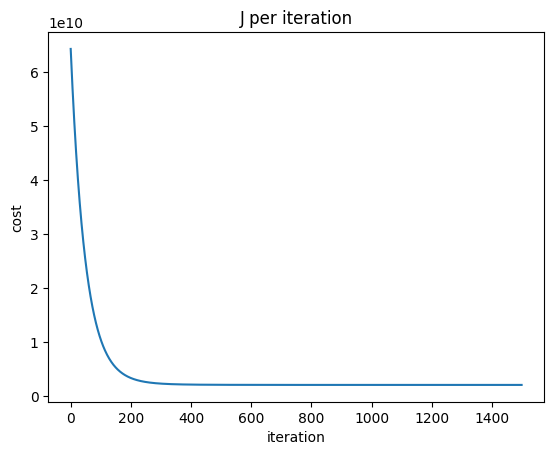

In [36]:
plt.plot(J_history)
plt.title('J per iteration')
plt.xlabel('iteration')
plt.ylabel('cost')

If we want to make a prediction on a normalized dataset, we have to normalize our input too.

In [39]:
price = theta.transpose() @ np.array([1, (1650 - mu[0]) / sigma[0], (3 - mu[1]) / sigma[1]])  # normalize the input
print('In a house of 1650 square feet with 3 rooms, we predict a price of $%.2f' % price)


In a house of 1650 square feet with 3 rooms, we predict a price of $293098.47


<ipython-input-39-ae27e0f669c5>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('In a house of 1650 square feet with 3 rooms, we predict a price of $%.2f' % price)


### Using normal equations
We can use normal equations to get the exact solution in only one calculation. Although using normal equations is very fast for a small datasets with a small number of features, it can be inefficient for larger datasets because the complexity of matrix multiplication is $O(n^3)$.

The normal equation for linear regression is:

$\theta = 􏰅 (X^TX)^{−1}X^T\vec{y}$

**Exercise**: Find theta using normal equations.

In [40]:
import numpy as np

def normal_equation(X, y):
    """
    Berechnet die Werte für theta mit der Normalengleichung.

    X: Feature-Matrix (m x n+1), wobei die erste Spalte 1 für den Bias-Term enthält
    y: Zielwerte (m x 1)

    Rückgabe: theta (n+1 x 1)
    """
    # Berechnung der Normalengleichung: theta = (X^T X)^(-1) X^T y
    return np.linalg.inv(X.T @ X) @ X.T @ y

# Beispiel: Angenommen, du hast X und y schon definiert und normalisiert
theta_normal = normal_equation(X, y)
print("Theta aus der Normalengleichung:")
print(theta_normal)



array([[340412.56301439],
       [109370.05670462],
       [ -6500.61509587]])

In [43]:
price = theta.transpose() @ np.array([1, (1650 - mu[0]) / sigma[0], (3 - mu[1]) / sigma[1]])  # normalize the input
print('In a house of 1650 square feet with 3 rooms, we predict a price of $%.2f' % price)


In a house of 1650 square feet with 3 rooms, we predict a price of $293098.47


<ipython-input-43-ae27e0f669c5>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('In a house of 1650 square feet with 3 rooms, we predict a price of $%.2f' % price)
